In [1]:
# im p o r t i n g Q i s k i t
from qiskit import IBMQ, Aer , assemble , transpile
from qiskit import QuantumCircuit , ClassicalRegister, QuantumRegister

# impor t b a s i c t o o l s
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd
from qiskit.visualization import plot_histogram
from math import pi , sqrt

In [2]:
#Función que a s i g n a una f a s e a cada e s t a d o p o s i b l e con 1 q u b i t
#Los v a l o r e s de en t r a d a se o b t i e n e n de l a m a t r i z de f a s e s

def coste1q(a,b) :
    qc = QuantumCircuit ( 1 )
    qc.p(a, 0)
    qc.x(0)
    qc.p(b, 0)
    return qc


In [3]:
# Función para p a s a r l a m a t r i z de c o s t e s a f a s e s
def escalarMatriz(m2) :
    matrix = pd.DataFrame (m2)
    maxValues = matrix.max( axis = 1 )
    minValues = matrix.min( axis = 1 )

    for i in range ( 5 ) :
        a = maxValues[i]
        b = minValues[i]
        c = (a-b)/2
        for j in range ( 5 ) :
            d = m2[i][j]
            if( d>=b ) and ( d<=b+c ):
                m2[ i ] [ j ]=0
            elif( d>=b+c+1) and ( d<=a ):
                m2[i][j]= pi /2
    return m2


In [4]:
#De f in imos f u n c i ó n que da l a s f a s e s a l o s d i f e r e n t e s e s t a d o s
def phasing( ):
    qc = QuantumCircuit( 5 )
    cPhase0000=coste1q(m[0][1] + m[1][2] + m[2][3] , m[0][1] + m[1][2] + m[2][4]).to_gate( ).control(4)
    qc.x([ 1 , 2 , 3 , 4 ] )
    qc.append( cPhase0000 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.x( [ 1 , 2 , 3 , 4 ] )
    
    cPhase0001=coste1q(m[0][1] + m[1][3] + m[3][4] , m[0][1] + m[1][3] + m[3][2]).to_gate( ).control(4)
    qc.cx(1, [ 2 , 3 , 4 ])
    qc.append(cPhase0001 , [ 4 , 3 , 2 , 1 , 0 ])
    qc.cx(1, [ 2 , 3 , 4 ] )
    
    cPhase0010=coste1q(m[0][1] + m[1][4] + m[4][2] , m[0][1] + m[1][4] + m[4][3]).to_gate( ).control(4)
    qc.cx ( 2 , [ 1 , 3 , 4 ] )
    qc.append ( cPhase0010 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.cx ( 2 , [ 1 , 3 , 4 ] )
    
    cPhase0011=coste1q( pi , pi ).to_gate( ).control(4)
    qc.mcx ( [ 1 , 2 ] , 3 )
    qc.mcx ( [ 1 , 2 ] , 4 )
    qc.append ( cPhase0011 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 1 , 2 ] , 3 )
    qc.mcx ( [ 1 , 2 ] , 4 )
    
    cPhase0100=coste1q(m[0][2] + m[2][3] + m[3][4] , m[0][2] + m[2][3] + m[3][1]).to_gate( ).control(4)
    qc.cx( 3 , 4 )
    qc.cx( 3 , 1 )
    qc.cx( 3 , 2 )
    qc.append( cPhase0100 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.cx ( 3 , 4 )
    qc.cx ( 3 , 1 )
    qc.cx ( 3 , 2 )
    
    cPhase0101=coste1q(m[0][2] + m[2][4] + m[4][1] , m[0][2] + m[2][4] + m[4][3]).to_gate( ).control(4)
    qc.mcx ( [ 1 , 3 ] , 2 )
    qc.mcx ( [ 1 , 3 ] , 4 )
    qc.append ( cPhase0101 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 1 , 3 ] , 2 )
    qc.mcx ( [ 1 , 3 ] , 4 )
    
    cPhase0110=coste1q(m[0][2] + m[2][1] + m[1][3] ,m [0][2] + m[2][1 ] +m[1][4]).to_gate( ).control(4)
    qc.mcx ( [ 2 , 3 ] , 1 )
    qc.mcx ( [ 2 , 3 ] , 4 )
    qc.append ( cPhase0110 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 2 , 3 ] , 1 )
    qc.mcx ( [ 2 , 3 ] , 4 )
    
    cPhase0111=coste1q( pi , pi ).to_gate( ).control(4)
    qc.mcx ( [ 1 , 2 , 3 ] , 4 )
    qc.append ( cPhase0111 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 1 , 2 , 3 ] , 4 )
    
    cPhase1000=coste1q(m[0][3] +m[3][4] +m[4][1] ,m[0][3] +m[3][4] +m[4][2] ).to_gate( ).control(4)
    qc.cx ( 4 , [ 3 , 2 , 1 ] )
    qc.append ( cPhase1000 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.cx ( 4 , [ 3 , 2 , 1 ] )
    
    cPhase1001=coste1q(m[0][3] +m[3][1] +m[1][2] ,m[0][3] +m[3][1] +m[1][4]).to_gate( ).control(4)
    qc.mcx ( [ 4 , 1 ] , 3 )
    qc.mcx ( [ 4 , 1 ] , 2 )
    qc.append ( cPhase1001 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 4 , 1 ] , 3 )
    qc.mcx ( [ 4 , 1 ] , 2 )
    
    cPhase1010=coste1q(m[0][3] +m[3][2] +m[2][4] ,m[0][3] +m[3][2] +m[2][1]).to_gate( ).control(4)
    qc . mcx ( [ 4 , 2 ] , 3 )
    qc . mcx ( [ 4 , 2 ] , 1 )
    qc . append ( cPhase1010 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc . mcx ( [ 4 , 2 ] , 3 )
    qc . mcx ( [ 4 , 2 ] , 1 )
    
    cPhase1011=coste1q( pi , pi ).to_gate( ).control(4)
    qc.mcx ( [ 4 , 2 , 1 ] , 3 )
    qc.append ( cPhase1011 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 4 , 2 , 1 ] , 3 )
    
    cPhase1100=coste1q(m[0][4] +m[4][1] +m[1][2] ,m[0][4] +m[4][1] +m[1][3]).to_gate( ).control(4)
    qc.mcx ( [ 4 , 3 ] , 2 )
    qc.mcx ( [ 4 , 3 ] , 1 )
    qc.append ( cPhase1100 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 4 , 3 ] , 2 )
    qc.mcx ( [ 4 , 3 ] , 1 )
    
    cPhase1101=coste1q(m[0][4] +m[4][2] +m[2][3] ,m[0][4] +m[4][2] +m[2][1]).to_gate( ).control(4)
    qc.mcx ( [ 4 , 3 , 1 ] , 2 )
    qc.append ( cPhase1101 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 4 , 3 , 1 ] , 2 )
    
    cPhase1110=coste1q(m[0][4] +m[4][3] +m[3][1] ,m[0][4] +m[4][3] +m[3][2]).to_gate( ).control(4)
    qc.mcx ( [ 4 , 3 , 2 ] , 1 )
    qc.append ( cPhase1110 , [ 4 , 3 , 2 , 1 , 0 ] )
    qc.mcx ( [ 4 , 3 , 2 ] , 1 )
    
    cPhase1111=coste1q( pi , pi ).to_gate( ).control(4)
    qc.append ( cPhase1111 , [ 4 , 3 , 2 , 1 , 0 ] )
    return qc



In [5]:
#De f in imos n u e s t r a f u n c i ó n que hará de am p l i f i c a d o r o d i f u s o r ( Fuen te :q i s k i t . org )

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    qc.h(nqubits - 1)
    qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)
    for qubit in range(nqubits):
        qc.x(qubit)
    for qubit in range(nqubits):
        qc.h(qubit)
    U_s = qc.to_gate()
    U_s.name = "I"
    return U_s

In [48]:
#Por úl t im o , r e al i z am o s l a s im ul a c i ó n
#M a tr i z de c o s t e s i n t r o d u c i d a a mano , o generada por l a f u n c i ó n a l e a t o r i am e n t e
costes = [[np.nan, 639.58, 959.34, 697.95, 348.29] , [639.58, np.nan, 343.56, 263.90, 683.92] , [959.34, 343.56, np.nan, 320.31, 917.96] , [697.95, 263.90, 320.31, np.nan, 602.47] , [348.29, 683.92, 917.96, 602.47, np.nan]]
#c o s t e s = g e n e r a rM a t ri z ( )
costes1 = np.copy(costes)


In [49]:
#La pasamos por l a f u n c i ó n e s c a l a rM a t r i z
m = escalarMatriz( costes1 )
print(m)

[[       nan 0.         1.57079633 1.57079633 0.        ]
 [1.57079633        nan 0.         0.         1.57079633]
 [1.57079633 0.                nan 0.         1.57079633]
 [1.57079633 0.         0.                nan 1.57079633]
 [0.         1.57079633 1.57079633 0.                nan]]


In [50]:
tsp5 = QuantumCircuit( 5 )
tsp5.h( [ 0 , 1 , 2 , 3 , 4 ] )


In [51]:
phase = phasing().to_gate()
phase.name="C"

In [93]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.primitives import Sampler

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

for i in range ( 1 ) :
    tsp5.append ( phase , [ 0 , 1 , 2 , 3 , 4 ] )
    tsp5.append ( diffuser( 5 ) , [ 0 , 1 , 2 , 3 , 4 ] )
    


tsp5.measure_all()

aer_sim = Aer.get_backend( 'aer_simulator')
transpiled_grover_circuit = transpile( tsp5 , aer_sim )
qobj = assemble(transpiled_grover_circuit)
results = aer_sim.run( qobj ).result()
counts = results.get_counts ( )
#plot_histogram( counts , title=' First iteration' )





C:\Users\jaifu\AppData\Local\Temp\ipykernel_6732\659969205.py:18: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run( qobj ).result()


In [108]:
max_state = max(counts, key=counts.get)
print(f"Estado con el mayor número de counts: {max_state[0]} con {counts[max_state]} counts")
maxB =format(int(max_state[0]), '05b')
print(maxB)

Estado con el mayor número de counts: 0 con 11 counts
00000


In [109]:
# Definimos nuestro oráculo Uf para marcar la ruta óptima
def Uf_tsp(circuit, qreg, ancilla):
    # Convertir el índice de la ruta óptima a binario y aplicarlo como control
    for i, bit in enumerate(maxB):
        if bit == '0':
            circuit.x(qreg[i])
    circuit.mcx(qreg, ancilla)
    for i, bit in enumerate(maxB):
        if bit == '0':
            circuit.x(qreg[i])

In [110]:
# Definimos la función de inversión
def inversion(circuit, quantum_reg, ancilla):
    circuit.h(quantum_reg)
    circuit.x(quantum_reg)
    circuit.mcx(quantum_reg, ancilla)
    circuit.x(quantum_reg)
    circuit.h(quantum_reg)

In [111]:
# Implementamos el algoritmo de Grover visto en clase
def grover(U_f, n=5, iterations=4):
    qreg = QuantumRegister(n, 'q')
    ancilla = QuantumRegister(1, 'ancilla')
    creg = ClassicalRegister(n, 'medición')

    grover_circuit = QuantumCircuit(qreg, ancilla, creg)

    # Paso inicial - igual superposición
    grover_circuit.h(qreg)

    # Iniciar ancilla
    grover_circuit.x(ancilla)
    grover_circuit.h(ancilla)
    grover_circuit.barrier()

    # Iteraciones de Grover
    for _ in range(iterations):
        # Consulta (query)
        U_f(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()

        # Inversión
        inversion(grover_circuit, qreg, ancilla)
        grover_circuit.barrier()

    # Regresar el ancilla
    grover_circuit.h(ancilla)
    grover_circuit.x(ancilla)
    grover_circuit.barrier()

    # Medición
    grover_circuit.measure(qreg, creg)

    # Ejecutar el circuito
    sampler = Sampler()
    job = sampler.run(grover_circuit)

    probs = job.result().quasi_dists[0].binary_probabilities()

    # Imprimir el resultado
    for outcome in probs:
        print("El elemento", outcome, "es observado con probabilidad", probs[outcome])

    display(grover_circuit.draw(output='mpl'))

El elemento 00000 es observado con probabilidad 0.9991823155432752
El elemento 00001 es observado con probabilidad 2.63769179583e-05
El elemento 00010 es observado con probabilidad 2.63769179583e-05
El elemento 00011 es observado con probabilidad 2.63769179583e-05
El elemento 00100 es observado con probabilidad 2.63769179583e-05
El elemento 00101 es observado con probabilidad 2.63769179583e-05
El elemento 00110 es observado con probabilidad 2.63769179583e-05
El elemento 00111 es observado con probabilidad 2.63769179583e-05
El elemento 01000 es observado con probabilidad 2.63769179583e-05
El elemento 01001 es observado con probabilidad 2.63769179583e-05
El elemento 01010 es observado con probabilidad 2.63769179583e-05
El elemento 01011 es observado con probabilidad 2.63769179583e-05
El elemento 01100 es observado con probabilidad 2.63769179583e-05
El elemento 01101 es observado con probabilidad 2.63769179583e-05
El elemento 01110 es observado con probabilidad 2.63769179583e-05
El elemen

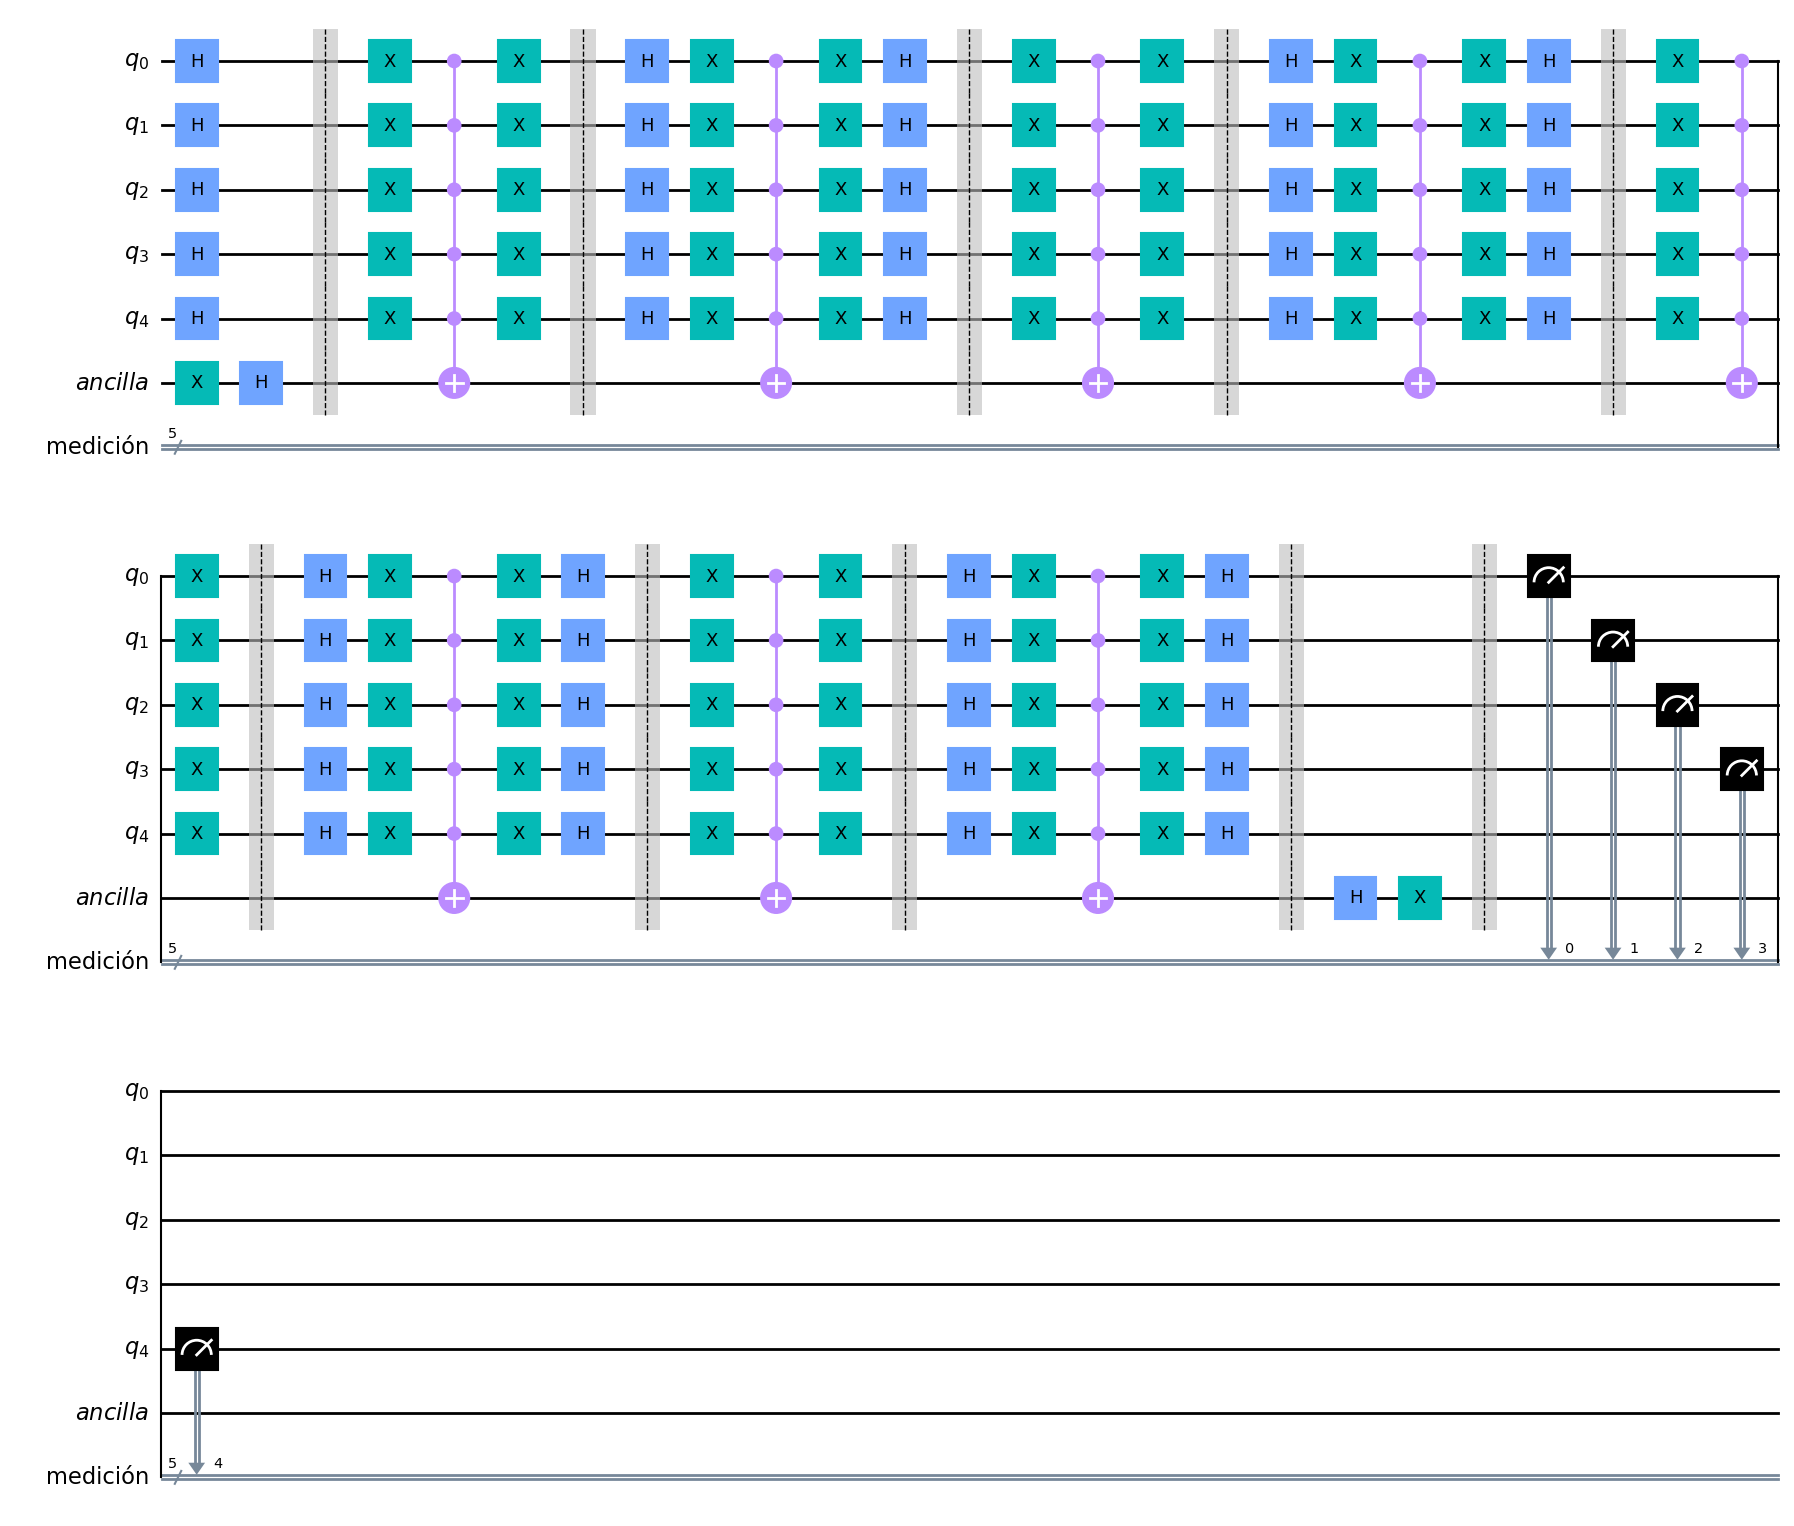

In [112]:
# Ejecutar el algoritmo de Grover para el oráculo definido
grover(Uf_tsp)